In [1]:
#『詳解ディープラーニング』より引用のロジスティック回帰コード（多クラス分類）の解説メモ　自分用

In [3]:
import numpy as np
from sklearn.utils import shuffle

In [96]:
M = 2
K = 3
n = 100
N = n * K
X1 = np.random.randn(n, M) + np.array([0, 10])
X2 = np.random.randn(n, M) + np.array([5, 5])
X3 = np.random.randn(n, M) + np.array([10, 0])
Y1 = np.array([[1, 0, 0] for i in range(n)])
Y2 = np.array([[0, 1, 0] for i in range(n)])
Y3 = np.array([[0, 0, 1] for i in range(n)])
X = np.concatenate((X1, X2, X3), axis = 0)
Y = np.concatenate((Y1, Y2, Y3), axis = 0)

In [97]:
import matplotlib.pyplot as plt
%matplotlib inline

/Users/enc/.pyenv/versions/3.5.2/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


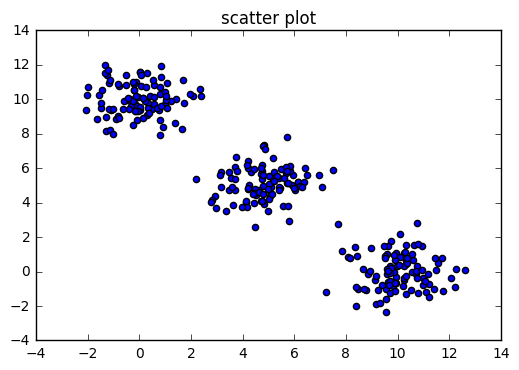

In [98]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(X[:,0],X[:,1])
ax.set_title('scatter plot')
fig.show()

In [99]:
import tensorflow as tf
import numpy as np

In [100]:
w = tf.Variable(tf.zeros([M,K]))
b = tf.Variable(tf.zeros([K]))

In [101]:
#↑二値問題のときは↓のように記述していたのが改訂されている
#w = tf.Variable(tf.zeros([2,1]))
#b = tf.Variable(tf.zeros([1]))

In [102]:
x = tf.placeholder(tf.float32, shape=[None, M])
t = tf.placeholder(tf.float32, shape=[None, K])
y = tf.nn.softmax(tf.matmul(x, w) + b )

In [103]:
#↑二値問題のときは↓のように記述していたのが改訂されている
#変更点１：outputが１→Kになったので変化した
#変更点2：シグモイド関数がソフトマックス関数に置き換わった
#x = tf.placeholder(tf.float32, shape=[None, 2])
#t = tf.placeholder(tf.float32, shape=[None, 2])
#y = tf.nn.sigmoid(tf.matmul(x, w) + b )

In [104]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(t * tf.log(y),reduction_indices=[1]))

In [116]:
#↑コスト関数。大分違うので数式を要チェック　ミニバッチ学習なので、meanを入れている

In [106]:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

In [117]:
#↑コスト関数をミニバッチによる勾配降下法で重みを最適化

In [107]:
prediction = tf.equal(tf.argmax(y, 1), tf.argmax(t, 1))

In [115]:
#↑prediction = tf.equal(tf.argmax(y, 1), tf.argmax(t, 1))から両方の出力値が同じならTrue、違うならFalseを吐き出す

In [118]:
#↓ミニバッチのサイズ

In [108]:
batch_size = 50
n_batches = N

In [119]:
#↓tensor flowを動かす初期化

In [109]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [113]:
#↓学習プロセス。
#sess.run(train_step(最適化された重み), feed_dict={x:X_[start:end],t:Y_[start:end]})（入れ込む値、ラベルデータ）

In [110]:
for epoch in range(100):
    X_, Y_ = shuffle(X, Y)

    for i in range(n_batches):
        start = i * batch_size
        end = start + batch_size
        sess.run(train_step, feed_dict={x:X_[start:end],t:Y_[start:end]})
    
    print("epoch{} finished".format(epoch))
        

epoch0 finished
epoch1 finished
epoch2 finished
epoch3 finished
epoch4 finished
epoch5 finished
epoch6 finished
epoch7 finished
epoch8 finished
epoch9 finished
epoch10 finished
epoch11 finished
epoch12 finished
epoch13 finished
epoch14 finished
epoch15 finished
epoch16 finished
epoch17 finished
epoch18 finished
epoch19 finished
epoch20 finished
epoch21 finished
epoch22 finished
epoch23 finished
epoch24 finished
epoch25 finished
epoch26 finished
epoch27 finished
epoch28 finished
epoch29 finished
epoch30 finished
epoch31 finished
epoch32 finished
epoch33 finished
epoch34 finished
epoch35 finished
epoch36 finished
epoch37 finished
epoch38 finished
epoch39 finished
epoch40 finished
epoch41 finished
epoch42 finished
epoch43 finished
epoch44 finished
epoch45 finished
epoch46 finished
epoch47 finished
epoch48 finished
epoch49 finished
epoch50 finished
epoch51 finished
epoch52 finished
epoch53 finished
epoch54 finished
epoch55 finished
epoch56 finished
epoch57 finished
epoch58 finished
epoch59

In [111]:
X_, Y_ = shuffle(X, Y)

classified = prediction.eval(session=sess, feed_dict={
    x: X_[0:10],
    t: Y_[0:10]
})
prob = y.eval(session=sess, feed_dict={
    x: X_[0:10]
})

print('classified:')
print(classified)
print()
print('output probability:')
print(prob)

classified:
[ True  True  True  True  True  True  True  True  True  True]

output probability:
[[  5.88661533e-05   9.91878867e-01   8.06227978e-03]
 [  9.48813260e-01   5.11867069e-02   6.18223084e-10]
 [  9.18499768e-01   8.15002322e-02   2.80233028e-08]
 [  6.12738892e-04   9.98098195e-01   1.28907408e-03]
 [  3.07123847e-14   6.34334865e-04   9.99365628e-01]
 [  9.93924916e-01   6.07509166e-03   1.22011498e-10]
 [  2.21772456e-16   4.17987394e-05   9.99958158e-01]
 [  2.51425446e-15   6.65655898e-05   9.99933481e-01]
 [  1.64240468e-02   9.83123899e-01   4.52042907e-04]
 [  1.38538313e-12   5.35984116e-04   9.99463975e-01]]


In [112]:
#prediction = tf.equal(tf.argmax(y, 1), tf.argmax(t, 1))から両方の出力値が同じならTrue、違うならFalseを吐き出す